<a href="https://colab.research.google.com/github/sarthak-X/sarthak/blob/main/forest_cover_type_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()

Saving train.csv to train.csv


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


Shape: (15120, 56)

Missing values: 0

Target Value Counts:
Cover_Type
5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: count, dtype: int64


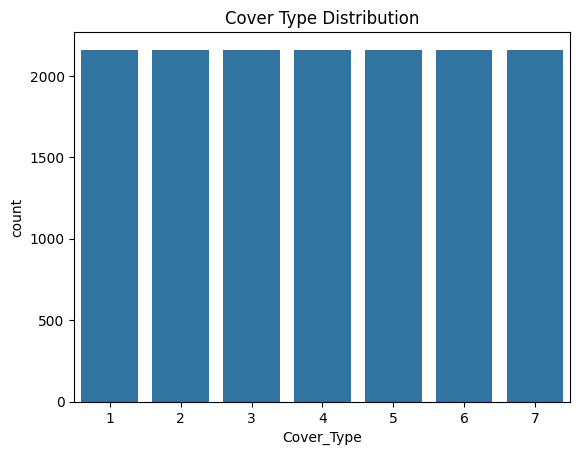

In [ ]:
print('Shape:', df.shape)
print('\nMissing values:', df.isnull().sum().sum())
print('\nTarget Value Counts:')
print(df['Cover_Type'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cover_Type', data=df)
plt.title('Cover Type Distribution')
plt.show()


In [ ]:
df = df.drop('Id', axis=1)

# Split features and label
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Scale only continuous features (first 10 columns)
scaler = StandardScaler()
X.iloc[:, :10] = scaler.fit_transform(X.iloc[:, :10])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-7-3439631692.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.36709512 -0.38146072  0.1309124  ... -0.61609888 -0.62807021
 -0.65680142]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, :10] = scaler.fit_transform(X.iloc[:, :10])
/tmp/ipython-input-7-3439631692.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.95997982 -0.9145592  -0.16057691 ... -0.20599753  0.09377856
  0.36630228]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, :10] = scaler.fit_transform(X.iloc[:, :10])
/tmp/ipython-input-7-3439631692.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.59713163 -1.71542377 -0.8873788  ...  1.00529541  1.36017182
  2.06992465]' has dt

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.8716931216931217

Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.77      0.78       421
           2       0.82      0.71      0.76       438
           3       0.83      0.84      0.84       428
           4       0.93      0.98      0.96       449
           5       0.89      0.96      0.92       416
           6       0.87      0.86      0.86       432
           7       0.95      0.97      0.96       440

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



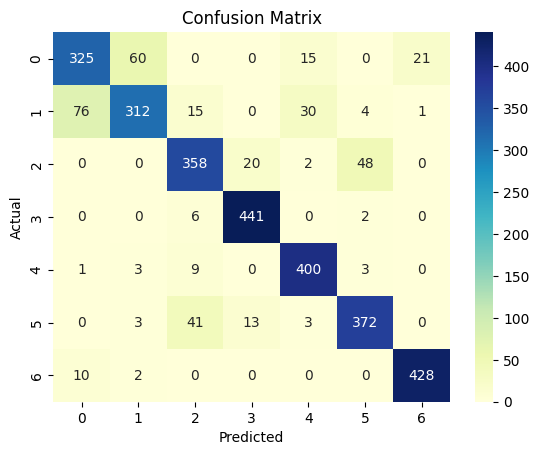

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


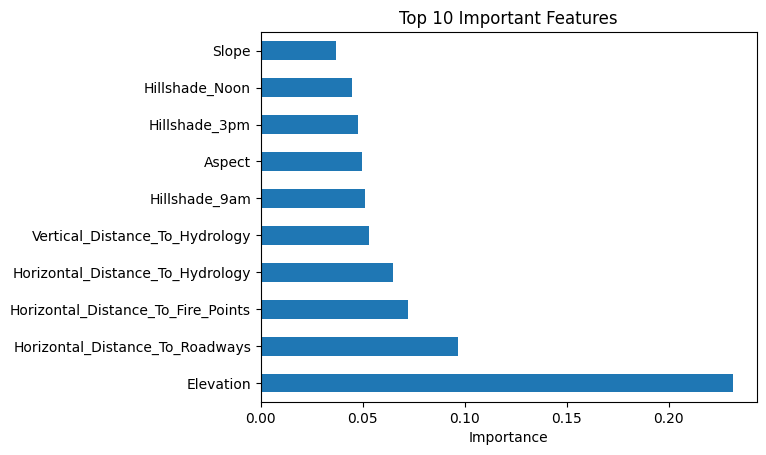

In [ ]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh', title='Top 10 Important Features')
plt.xlabel('Importance')
plt.show()